In [16]:
from pylab import *
%run "mis_int.ipynb"
%matplotlib inline

Hay que resolver
$$\dfrac{d²\vec \rho}{d \tau ^2}=-\dfrac{\hat \rho}{\rho ²}$$

In [10]:
def mov_planeta(x,t):
    r3 = (x[0]**2 + x[1]**2)**(1.5)
    drx = x[2]
    dry = x[3]
    dvrx = -x[0]/r3
    dvry = -x[1]/r3
    return array([drx,dry,dvrx,dvry])
def J_mov_planeta(x,t):
    d_ec = array([0,0,0,0])
    r5 = (x[0]**2 + x[1]**2)**(2.5)
    rxmry = (2*x[0]*x[0]-x[1]*x[1])/r5
    rymrx = (2*x[1]*x[1]-x[0]*x[0])/r5
    rxry= (3*x[0]*x[1])/r5
    Jac = array([[0,0,1,0],[0,0,0,1],[rxmry,rxry,0,0],[rxry,rymrx,0,0]])
    return d_ec, Jac

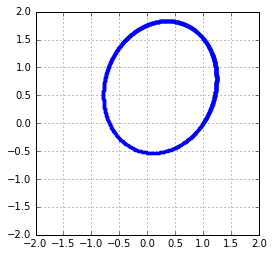

CPU times: user 119 ms, sys: 0 ns, total: 119 ms
Wall time: 118 ms


In [75]:
%%time
t,r_vr =rk2(mov_planeta,[1,0,.6,.9],[0,10],0.01)
zoom = 2
xlim([-zoom,zoom]),ylim([-zoom,zoom])
axes().set_aspect('equal'),grid(True)
plot(r_vr[:,0],r_vr[:,1],'.')
show()

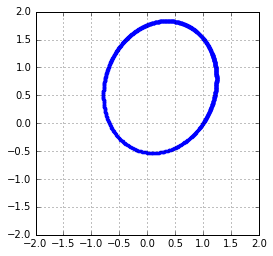

CPU times: user 168 ms, sys: 929 µs, total: 169 ms
Wall time: 168 ms


In [61]:
%%time
t,r_vr =integra2(mov_planeta,J_mov_planeta,[1,0,.6,.9],[0,10],0.01)
zoom = 2
xlim([-zoom,zoom]),ylim([-zoom,zoom])
axes().set_aspect('equal'),grid(True)
plot(r_vr[:,0],r_vr[:,1],'.')
show()

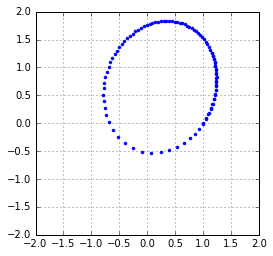

CPU times: user 113 ms, sys: 997 µs, total: 114 ms
Wall time: 113 ms


In [48]:
%%time
t,r_vr =rk4(mov_planeta,[1,0,.6,.9],[0,10],0.1)
zoom = 2
xlim([-zoom,zoom]),ylim([-zoom,zoom])
axes().set_aspect('equal'),grid(True)
plot(r_vr[:,0],r_vr[:,1],'.')
show()

In [81]:
from scipy.integrate import *

In [82]:
h = 0.1
tiempos = arange(0,10+h,h)

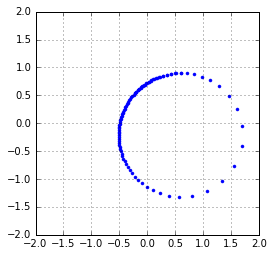

CPU times: user 109 ms, sys: 978 µs, total: 110 ms
Wall time: 109 ms


In [85]:
%%time
r_vr =odeint(mov_planeta,[1,0,.6,.9],tiempos)
zoom = 2
xlim([-zoom,zoom]),ylim([-zoom,zoom])
axes().set_aspect('equal'),grid(True)
plot(r_vr[:,2],r_vr[:,3],'.')
show()